In [10]:
import pandas as pd 
import re 

def time_to_second(t):
    h,m,s = t.split(":")
    return h*3600 + m*60 + s

df = pd.read_csv("../gpu_monitoring/2022-10-05.csv")
df['gpu_memory'] = df['gpu_memory'].apply(lambda x : int(re.findall(r'\d+', x)[0]))
df['time'] = df['time'].apply(lambda x : time_to_second(x))
df

,date,time,username,pid,gpu_memory,gpu_memory_percent,device
0,2022-10-05,17:44:39,wonjoon,39430,8105,33.0,1
1,2022-10-05,17:44:39,bumjin,25267,1009,4.1,2
2,2022-10-05,17:44:39,bumjin,38912,1055,4.3,2
3,2022-10-05,17:44:39,anhth,13327,1865,7.6,5
4,2022-10-05,17:45:39,wonjoon,39430,8105,33.0,1
...,...,...,...,...,...,...,...
1387,2022-10-05,23:58:09,anhth,32862,1863,7.6,5
1388,2022-10-05,23:59:09,wonjoon,39430,8105,33.0,1
1389,2022-10-05,23:59:09,bumjin,29162,1055,4.3,2
1390,2022-10-05,23:59:09,bumjin,29287,1009,4.1,2


In [11]:
import seaborn as sns 
df_g = df[['username', 'device', 'time', 'gpu_memory', 'gpu_memory_percent']].groupby(['username', 'device', 'time']).sum().reset_index()
df_g 

,username,device,time,gpu_memory,gpu_memory_percent
0,anhth,5,17:44:39,1865,7.6
1,anhth,5,17:45:39,1865,7.6
2,anhth,5,17:46:39,1865,7.6
3,anhth,5,17:47:39,1865,7.6
4,anhth,5,17:48:40,1865,7.6
...,...,...,...,...,...
1012,wonjoon,1,23:55:08,8105,33.0
1013,wonjoon,1,23:56:08,8105,33.0
1014,wonjoon,1,23:57:08,8105,33.0
1015,wonjoon,1,23:58:09,8105,33.0


<AxesSubplot:xlabel='time', ylabel='gpu_memory'>

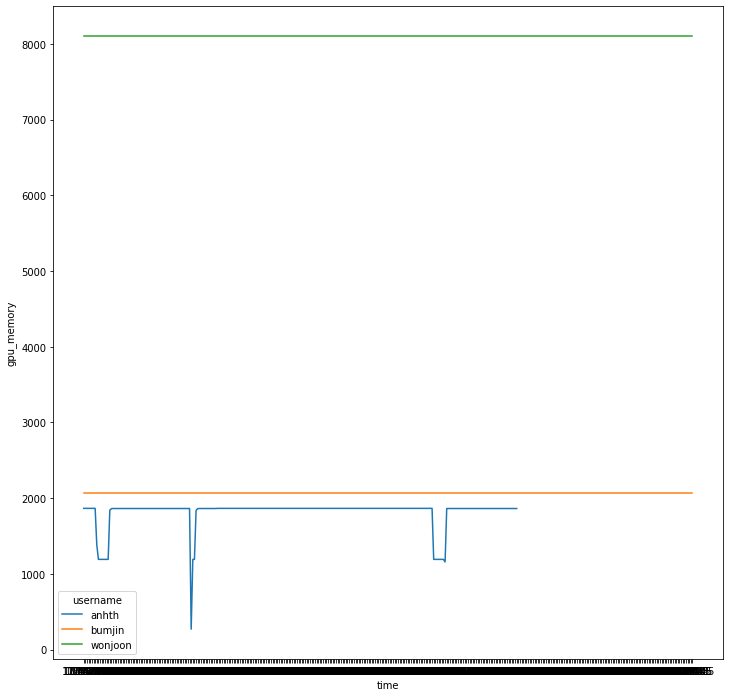

In [16]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,12), facecolor='white')
sns.lineplot(x='time',y='gpu_memory', hue='username', data=df_g)